# Exploration of GABA Receptors

In [651]:
cd ..

/cellar/users/agross/TCGA_Code


In [652]:
import NotebookImport
from metaPCNA import *

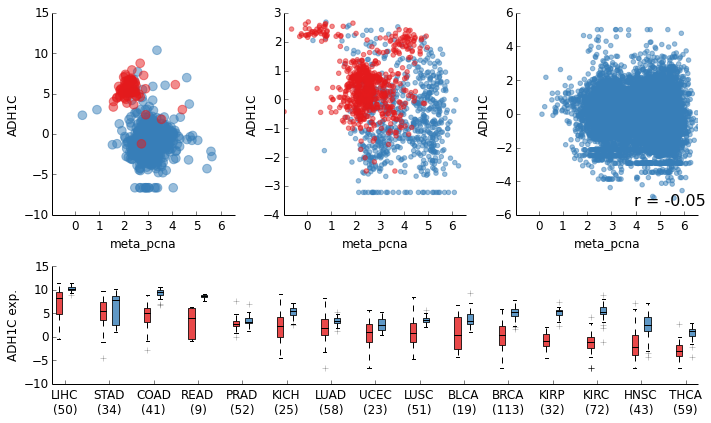

In [653]:
switch_plot('ADH1C')

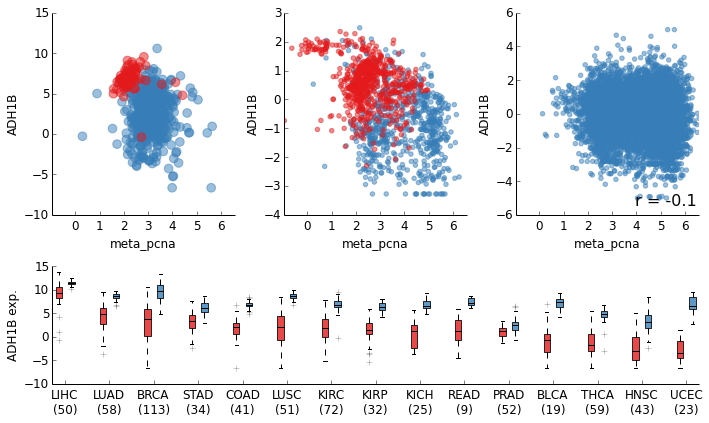

In [654]:
switch_plot('ADH1B')

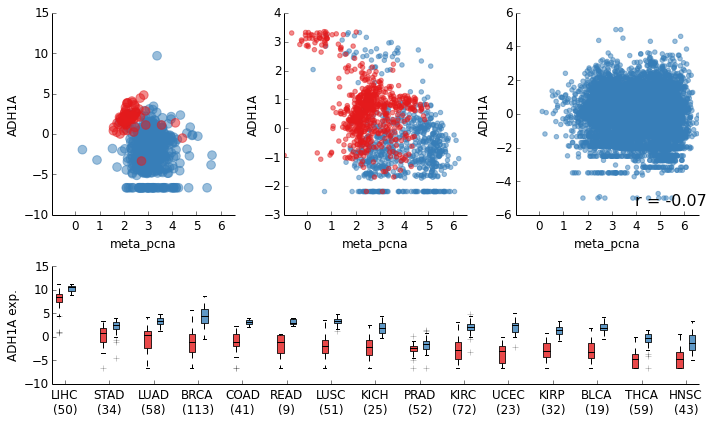

In [655]:
switch_plot('ADH1A')

In [656]:
adh = [g for g in rna_df.index if g.startswith('ROR')]
f = dx_rna.ix[adh].dropna()
f.join(f_win).sort(f_win.name).sort('frac')

,num_ox,num_dx,frac,p,fraction overexpressed (detrended)
RORB,180,679,0.27,1.49e-35,-0.20
RORA,194,684,0.28,1.96e-30,-0.10
ROR1,211,684,0.31,5.18e-24,-0.09
RORC,296,684,0.43,4.94e-04,0.02
ROR2,304,684,0.44,4.10e-03,-0.09


In [93]:
adh = [g for g in rna_df.index if g.startswith('ADH') and g != 'ADHFE1']
f = dx_rna.ix[adh].dropna()
f.join(f_win).sort(f_win.name).sort('frac')

,num_ox,num_dx,frac,p,fraction overexpressed (detrended)
ADH1B,38,684,0.06,9.59e-144,-0.30
ADH1A,44,684,0.06,1.35e-136,-0.32
ADH1C,87,684,0.13,2.03e-94,-0.33
ADH5,193,684,0.28,7.70e-31,-0.21
ADH7,171,596,0.29,6.39e-26,-0.20
ADH4,196,682,0.29,2.53e-29,-0.17
ADH6,202,684,0.30,2.65e-27,-0.19


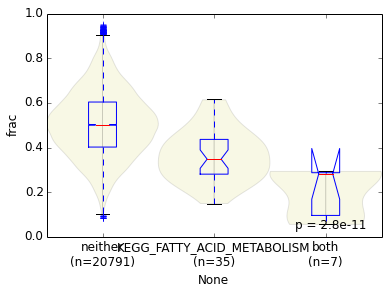

In [43]:
aa = pd.Series(1, adh).ix[rna_df.index].fillna(0)
cc = combine(aa, gene_sets['KEGG_FATTY_ACID_METABOLISM']).order()
violin_plot_pandas(cc, dx_rna.frac)

In [44]:
anova(pd.Series(1, adh).ix[rna_df.index].fillna(0), f_win)

F    3.28e+01
p    1.05e-08
dtype: float64

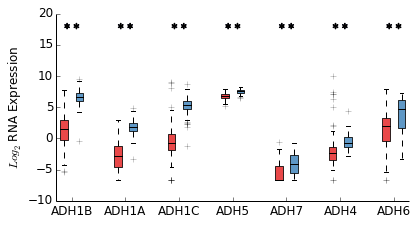

In [45]:
paired_boxplot_tumor_normal(matched_rna.ix[adh].ix[:, ti(codes.str.startswith('K'))].T, 
                            order=list(f.frac.order().index))
plt.gca().get_legend().set_visible(False)
prettify_ax(plt.gca())

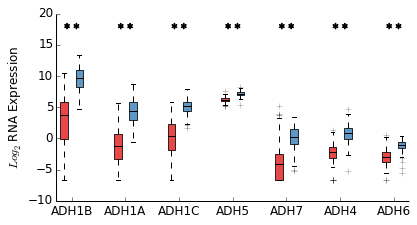

In [104]:
paired_boxplot_tumor_normal(matched_rna.ix[adh].ix[:, ti(codes=='BRCA')].T, 
                            order=list(f.frac.order().index))
plt.gca().get_legend().set_visible(False)
prettify_ax(plt.gca())

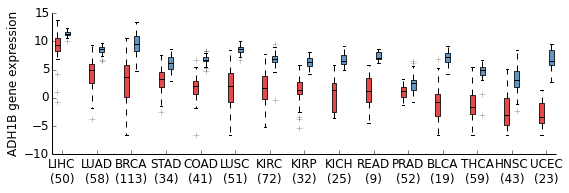

In [96]:
paired_bp_tn_split(rna_df.ix['ADH1B'], codes)

In [92]:
pearson_pandas(df_s3.xs('01',1,1).ix['ADH5'],
               df_s3.xs('01',1,1).ix['ADH7'])

rho    0.03
p      0.44
dtype: float64

In [91]:
pearson_pandas(df_s3.xs('11',1,1).ix['ADH5'],
               df_s3.xs('11',1,1).ix['ADH7'])

rho   -4.99e-01
p      2.85e-44
dtype: float64

In [85]:
df_s3.xs('11',1,1).ix[adh].T.corr()

,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7
ADH1A,1.00,0.92,0.70,0.69,0.13,0.48,0.16
ADH1B,0.92,1.00,0.53,0.48,0.23,0.30,0.16
ADH1C,0.70,0.53,1.00,0.70,0.14,0.68,0.06
ADH4,0.69,0.48,0.70,1.00,-0.06,0.62,0.18
ADH5,0.13,0.23,0.14,-0.06,1.00,0.20,-0.50
ADH6,0.48,0.30,0.68,0.62,0.20,1.00,-0.14
ADH7,0.16,0.16,0.06,0.18,-0.50,-0.14,1.00


In [95]:
rna_df.xs('01',1,1).ix[:, ti(codes=='LIHC')].ix[adh].T.corr()

,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7
ADH1A,1.00,0.74,0.50,0.69,0.33,0.68,0.51
ADH1B,0.74,1.00,0.68,0.73,0.42,0.68,0.61
ADH1C,0.50,0.68,1.00,0.52,0.20,0.45,0.37
ADH4,0.69,0.73,0.52,1.00,0.35,0.72,0.52
ADH5,0.33,0.42,0.20,0.35,1.00,0.53,0.43
ADH6,0.68,0.68,0.45,0.72,0.53,1.00,0.46
ADH7,0.51,0.61,0.37,0.52,0.43,0.46,1.00


In [84]:
df_s.ix[adh].T.corr()

,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7
ADH1A,1.00,0.71,0.59,0.35,0.23,0.33,0.21
ADH1B,0.71,1.00,0.53,0.24,0.17,0.19,0.17
ADH1C,0.59,0.53,1.00,0.29,0.22,0.32,0.23
ADH4,0.35,0.24,0.29,1.00,0.22,0.36,0.14
ADH5,0.23,0.17,0.22,0.22,1.00,0.36,0.13
ADH6,0.33,0.19,0.32,0.36,0.36,1.00,0.18
ADH7,0.21,0.17,0.23,0.14,0.13,0.18,1.00


In [81]:
dx.ix[adh].T.corr()

,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7
ADH1A,1.00,0.84,0.63,0.23,0.32,0.21,0.19
ADH1B,0.84,1.00,0.53,0.13,0.26,0.10,0.11
ADH1C,0.63,0.53,1.00,0.39,0.28,0.34,0.36
ADH4,0.23,0.13,0.39,1.00,0.16,0.40,0.29
ADH5,0.32,0.26,0.28,0.16,1.00,0.32,0.14
ADH6,0.21,0.10,0.34,0.40,0.32,1.00,0.11
ADH7,0.19,0.11,0.36,0.29,0.14,0.11,1.00


In [48]:
dx_rna.ix[adh]

,num_ox,num_dx,frac,p
ADH1A,44,684,0.06,1.35e-136
ADH1B,38,684,0.06,9.59e-144
ADH1C,87,684,0.13,2.03e-94
ADH4,196,682,0.29,2.53e-29
ADH5,193,684,0.28,7.70e-31
ADH6,202,684,0.30,2.65e-27
ADH7,171,596,0.29,6.39e-26


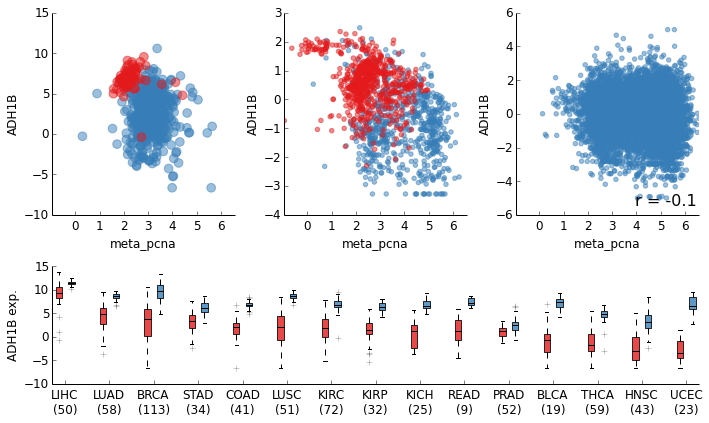

In [79]:
switch_plot('ADH1B')

In [141]:
rr2 = df_s.corrwith(df_s.ix['GABRD'], 1).dropna()

In [126]:
rr = df_s.corrwith(df_s.ix[['ADH1A','ADH1B','ADH1C']].mean(), 1).dropna()
enr = screen_feature(rr.order(), rev_kruskal, gene_sets.T, align=False)
fp = (1.*gene_sets.T * rr).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'fc'
enr.head(4)

,H,p,q
REACTOME_CELL_CYCLE,373.76,2.84e-83,3.78e-80
REACTOME_CELL_CYCLE_MITOTIC,325.14,1.10e-72,7.33e-70
REACTOME_METABOLISM_OF_RNA,295.80,2.71e-66,1.20e-63
REACTOME_DNA_REPLICATION,289.31,7.04e-65,2.34e-62


In [135]:
enr.ix[ti(fp > 0)].join(fp).sort('p').head()

,H,p,q,fc
Gene_Set,,,,
NABA_MATRISOME,239.37,5.39e-54,1.19e-51,0.11
REACTOME_METABOLISM_OF_PROTEINS,177.90,1.39e-40,1.54e-38,0.00
NABA_CORE_MATRISOME,146.90,8.25e-34,4.99e-32,0.14
NABA_ECM_GLYCOPROTEINS,113.07,2.08e-26,8.13e-25,0.14
NABA_MATRISOME_ASSOCIATED,111.37,4.91e-26,1.87e-24,0.10


In [170]:
import statsmodels.api as sm

In [ ]:
%%time
nvm = {}
for g in rna_df.index:
    model = sm.OLS(df_s.ix[g], df_s.ix[['GABRD','ADH1B']].T)
    results = model.fit()
    nvm[g] = results.params
pp = pd.DataFrame(nvm).T

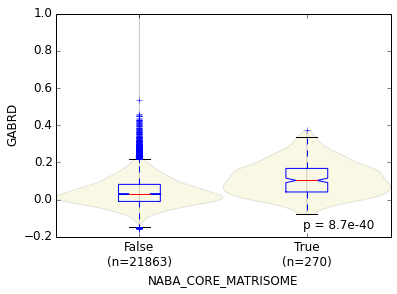

In [247]:
violin_plot_pandas(gene_sets['NABA_CORE_MATRISOME']>0, pp['GABRD'].dropna())

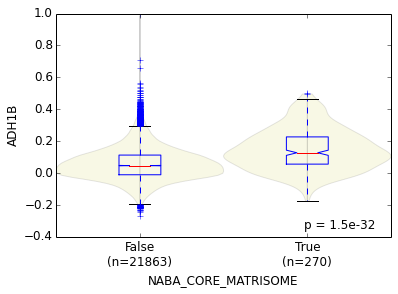

In [248]:
violin_plot_pandas(gene_sets['NABA_CORE_MATRISOME']>0, pp['ADH1B'].dropna())

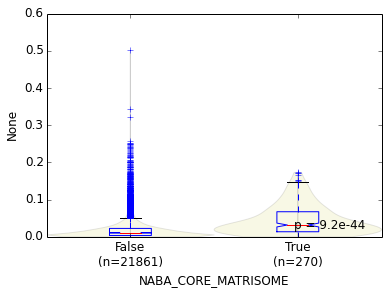

In [212]:
violin_plot_pandas(gene_sets['NABA_CORE_MATRISOME']>0, nvm.dropna())

In [213]:
enr = screen_feature(nvm, rev_kruskal, gene_sets.T, align=False)
fp = (1.*gene_sets.T * nvm).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'fc'
enr.head(4)

,H,p,q
REACTOME_OLFACTORY_SIGNALING_PATHWAY,542.45,5.53e-120,6.99e-117
KEGG_OLFACTORY_TRANSDUCTION,541.17,1.05e-119,6.99e-117
NABA_CORE_MATRISOME,192.47,9.20e-44,4.08e-41
NABA_MATRISOME,189.97,3.23e-43,1.07e-40


In [228]:
enr.head(10)

,H,p,q
REACTOME_OLFACTORY_SIGNALING_PATHWAY,542.45,5.53e-120,6.99e-117
KEGG_OLFACTORY_TRANSDUCTION,541.17,1.05e-119,6.99e-117
NABA_CORE_MATRISOME,192.47,9.20e-44,4.08e-41
NABA_MATRISOME,189.97,3.23e-43,1.07e-40
NABA_ECM_GLYCOPROTEINS,117.15,2.66e-27,7.07e-25
REACTOME_HEMOSTASIS,91.59,1.07e-21,2.36e-19
REACTOME_PLATELET_ACTIVATION_SIGNALING_AND_AGGREGATION,80.08,3.59e-19,6.83e-17
KEGG_CALCIUM_SIGNALING_PATHWAY,77.37,1.41e-18,2.35e-16
REACTOME_DEVELOPMENTAL_BIOLOGY,68.88,1.04e-16,1.54e-14
REACTOME_AXON_GUIDANCE,63.48,1.62e-15,2.16e-13


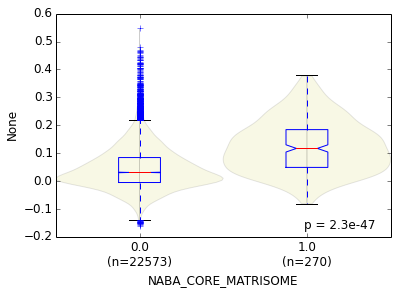

In [231]:
violin_plot_pandas(gene_sets['NABA_CORE_MATRISOME'],
                   rr2.replace(1, np.nan))

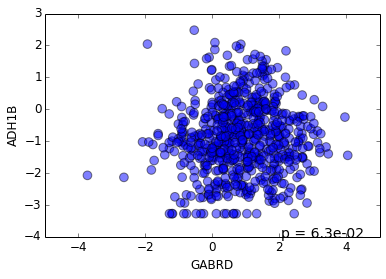

In [249]:
series_scatter(df_s3.ix['GABRD'][:,'01'], df_s3.ix['ADH1B'][:,'01'])

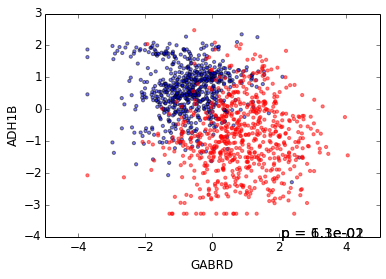

In [256]:
fig, ax = subplots()
series_scatter(df_s3.ix['GABRD'][:,'11'], df_s3.ix['ADH1B'][:,'11'], 
               ax=ax, s=10)
series_scatter(df_s3.ix['GABRD'][:,'01'], df_s3.ix['ADH1B'][:,'01'], 
               color='red', ax=ax, s=10)

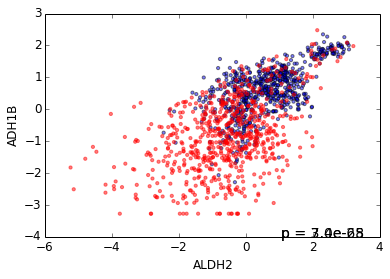

In [513]:
fig, ax = subplots()
series_scatter(df_s3.ix['ALDH2'][:,'11'], df_s3.ix['ADH1B'][:,'11'], 
               ax=ax, s=10)
series_scatter(df_s3.ix['ALDH2'][:,'01'], df_s3.ix['ADH1B'][:,'01'], 
               color='red', ax=ax, s=10)

In [268]:
rr3 = dx.T.corrwith(dx.ix['ADH1B']).dropna()

In [270]:
enr = screen_feature(rr3, rev_kruskal, gene_sets.T, align=False)
fp = (1.*gene_sets.T * rr3).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'fc'
enr.head(4)

,H,p,q
REACTOME_CELL_CYCLE,175.28,5.20e-40,6.91e-37
REACTOME_DNA_REPLICATION,146.59,9.66e-34,6.42e-31
KEGG_OLFACTORY_TRANSDUCTION,141.28,1.39e-32,6.18e-30
REACTOME_OLFACTORY_SIGNALING_PATHWAY,136.58,1.49e-31,4.94e-29


In [273]:
enr.ix[ti(fp > 0)].join(fp).sort('p').head()

,H,p,q,fc
Gene_Set,,,,
KEGG_OLFACTORY_TRANSDUCTION,141.28,1.39e-32,6.18e-30,0.01
REACTOME_OLFACTORY_SIGNALING_PATHWAY,136.58,1.49e-31,4.94e-29,0.01
NABA_CORE_MATRISOME,77.29,1.48e-18,1.30e-16,0.17
NABA_ECM_GLYCOPROTEINS,66.77,3.05e-16,2.14e-14,0.18
REACTOME_PLATELET_ACTIVATION_SIGNALING_AND_AGGREGATION,64.39,1.02e-15,6.80e-14,0.16


In [274]:
rr4 = dx.T.corrwith(dx.ix['GABRD']).dropna()

In [275]:
enr = screen_feature(rr4, rev_kruskal, gene_sets.T, align=False)
fp = (1.*gene_sets.T * rr4).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'fc'
enr.head(4)

,H,p,q
NABA_MATRISOME,109.64,1.17e-25,1.56e-22
REACTOME_PLATELET_ACTIVATION_SIGNALING_AND_AGGREGATION,98.58,3.12e-23,2.07e-20
REACTOME_HEMOSTASIS,92.03,8.55e-22,3.79e-19
REACTOME_IMMUNE_SYSTEM,90.92,1.49e-21,4.97e-19


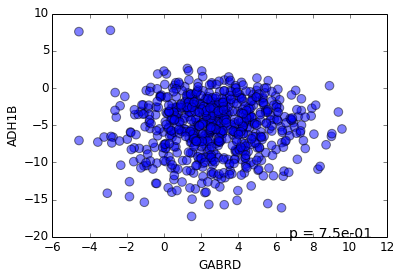

In [276]:
series_scatter(dx.ix['GABRD'], dx.ix['ADH1B'])

In [297]:
corr_profile = dx.T.corr()
corr_profile.to_hdf(STORE, 'dx_correlations')

In [432]:
len(gene_sets.columns)

1330

In [508]:
%%time
gene_set_t = {}
for gs in gene_sets.columns:
    mm = corr_profile.groupby(gene_sets[gs]).mean()
    vv = corr_profile.groupby(gene_sets[gs]).var()
    tt = ((mm.ix[1] - mm.ix[0]) / 
          np.sqrt(vv.div(gene_sets[gs].value_counts(), axis=0)).sum())
    tt = tt.dropna().order()
    gene_set_t[gs] = tt
gene_set_t = pd.DataFrame(gene_set_t)

CPU times: user 1h 19min 35s, sys: 8.41 s, total: 1h 19min 44s
Wall time: 1h 19min 48s


In [650]:
gene_set_t.to_hdf(STORE, 'gene_set_t_on_dx_corr')

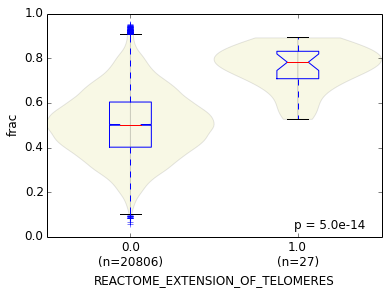

In [576]:
violin_plot_pandas(gene_sets['REACTOME_EXTENSION_OF_TELOMERES'],
                   dx_rna.frac)

In [593]:
v = gene_set_t['REACTOME_EXTENSION_OF_TELOMERES'].order()
v = v[v > 10]
dx_rna.join(v).join(f_win).sort(f_win.name).dropna().tail(20)

,num_ox,num_dx,frac,p,REACTOME_EXTENSION_OF_TELOMERES,fraction overexpressed (detrended)
NME2,519,684,0.76,1.72e-43,10.00,0.23
PDCD5,579,684,0.85,2.96e-80,10.56,0.23
GAPDH,613,684,0.90,1.49e-108,10.40,0.24
CNPY2,574,684,0.84,1.31e-76,11.23,0.24
PYCR1,595,684,0.87,9.28e-93,11.18,0.24
OR1F1,239,307,0.78,1.86e-23,10.30,0.24
PAQR4,635,684,0.93,6.31e-131,11.55,0.25
POP7,620,684,0.91,2.90e-115,12.25,0.25
CAMK2N2,597,684,0.87,2.03e-94,10.85,0.25
LAGE3,609,684,0.89,7.22e-105,11.92,0.25


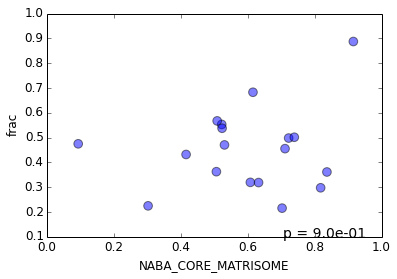

In [644]:
gabr = [g for g in rna_df.index if g.startswith('GABR')]
series_scatter(gene_set_t['NABA_CORE_MATRISOME'].rank(pct=True).ix[gabr].order(),
               dx_rna.frac)

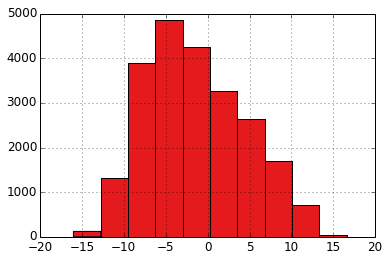

In [633]:
gene_set_t['NABA_CORE_MATRISOME'].hist()

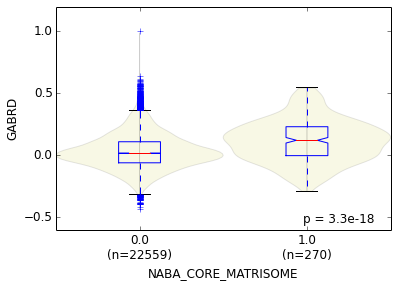

In [645]:
violin_plot_pandas(gene_sets['NABA_CORE_MATRISOME'],
                   corr_profile['GABRD'].dropna())

In [ ]:
vv = gene_set_t.corrwith(dx_rna.frac)

In [574]:
vv.order().tail(40)

REACTOME_P53_DEPENDENT_G1_DNA_DAMAGE_RESPONSE                   0.61
REACTOME_CELL_CYCLE_MITOTIC                                     0.62
REACTOME_EARLY_PHASE_OF_HIV_LIFE_CYCLE                          0.62
REACTOME_ACTIVATION_OF_THE_PRE_REPLICATIVE_COMPLEX              0.62
REACTOME_REGULATION_OF_MITOTIC_CELL_CYCLE                       0.62
REACTOME_APC_C_CDH1_MEDIATED_DEGRADATION_OF_CDC20_AND_OTHER_APC_C_CDH1_TARGETED_PROTEINS_IN_LATE_MITOSIS_EARLY_G1    0.62
BIOCARTA_SRCRPTP_PATHWAY                                        0.62
REACTOME_ORC1_REMOVAL_FROM_CHROMATIN                            0.63
KEGG_BASE_EXCISION_REPAIR                                       0.63
REACTOME_CELL_CYCLE                                             0.63
REACTOME_ASSOCIATION_OF_LICENSING_FACTORS_WITH_THE_PRE_REPLICATIVE_COMPLEX    0.63
REACTOME_BASE_EXCISION_REPAIR                                   0.63
REACTOME_HOST_INTERACTIONS_OF_HIV_FACTORS                       0.63
REACTOME_MITOTIC_M_M_G1_PHASES      

In [565]:
gene_set_t['KEGG_PPAR_SIGNALING_PATHWAY'].order()

HAUS1       -9.48
SUZ12P      -9.05
ASB3        -8.94
FANCL       -8.86
NR2C2AP     -8.75
LOC374443   -8.67
PCYOX1L     -8.67
ZNF26       -8.61
ZNF273      -8.60
KANSL2      -8.52
ZCCHC7      -8.46
POC5        -8.45
TRAPPC2     -8.35
C6orf147    -8.35
BUD31       -8.32
...
PMM1            6.60
GPX3            6.73
LOC100506229    6.76
ALPL            6.79
ABHD6           6.82
HPR             6.84
UGT2B4          6.89
MIR891A         6.94
LOC157273       6.99
MSRA            7.08
GPD1            7.25
ALDH2           7.34
ABCC6           7.37
ECHDC3          7.53
FAH             8.32
Name: KEGG_PPAR_SIGNALING_PATHWAY, Length: 22829, dtype: float64

In [670]:
vv = rna_df.xs('01',1,1).groupby(codes, axis=1).std()
mm = rna_df.xs('01',1,1).groupby(codes, axis=1).mean()
vv = np.log2((vv / mm)).mean(1)

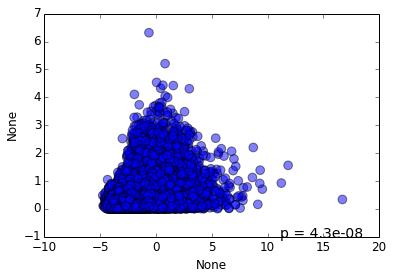

In [680]:
series_scatter(vv, dx.mean(1).abs())

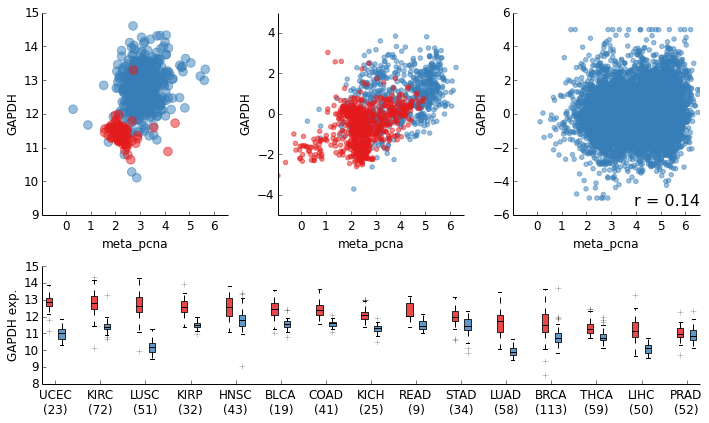

In [684]:
switch_plot('GAPDH')

In [683]:
dx_rna.ix[ti(vv < -4)].sort('p')

,num_ox,num_dx,frac,p
SNRPB,617,684,0.90,2.41e-112
GAPDH,613,684,0.90,1.49e-108
PPP4C,599,684,0.88,4.23e-96
FIBP,591,684,0.86,1.66e-89
TPI1,588,684,0.86,4.00e-87
PPIA,586,684,0.86,1.46e-85
SEC61A1,576,684,0.84,4.71e-78
CNPY2,574,684,0.84,1.31e-76
ADRM1,573,684,0.84,6.77e-76
TMED9,572,684,0.84,3.47e-75


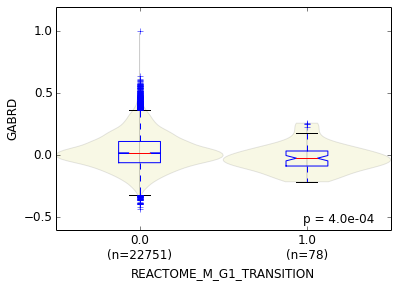

In [627]:
violin_plot_pandas(gene_sets['REACTOME_M_G1_TRANSITION'], 
                   corr_profile['GABRD'].dropna())

In [625]:
gene_set_t.rank(pct=False, ascending=True).ix[gabr].min().order()

REACTOME_M_G1_TRANSITION                                       6
REACTOME_S_PHASE                                               8
REACTOME_ASSEMBLY_OF_THE_PRE_REPLICATIVE_COMPLEX              10
REACTOME_DESTABILIZATION_OF_MRNA_BY_AUF1_HNRNP_D0             13
REACTOME_P53_DEPENDENT_G1_DNA_DAMAGE_RESPONSE                 14
REACTOME_SYNTHESIS_OF_DNA                                     14
SA_G1_AND_S_PHASES                                            15
REACTOME_AUTODEGRADATION_OF_THE_E3_UBIQUITIN_LIGASE_COP1      16
REACTOME_ORC1_REMOVAL_FROM_CHROMATIN                          20
REACTOME_CDK_MEDIATED_PHOSPHORYLATION_AND_REMOVAL_OF_CDC6     23
REACTOME_CDT1_ASSOCIATION_WITH_THE_CDC6_ORC_ORIGIN_COMPLEX    25
REACTOME_G1_S_TRANSITION                                      32
REACTOME_ER_PHAGOSOME_PATHWAY                                 34
REACTOME_PROTEOLYTIC_CLEAVAGE_OF_SNARE_COMPLEX_PROTEINS       34
REACTOME_SMOOTH_MUSCLE_CONTRACTION                            37
...
KEGG_VALINE_LEUCINE_A